# Feature selection for asdasd
#### importing libraries and reading in data

In [1]:
import csv
import matplotlib.pyplot as plot

rawData = []
with open('data/raw.csv') as csvfile: 
    readCSV = csv.reader(csvfile, delimiter=',')
    
    for row in readCSV:
        rawData.append(row)
print (len(rawData),",", len(rawData[0]))

146 , 3521


#### Transpose data and convert to true / false for simpler code

In [2]:
# convert to T/F
for row in range(len(rawData)):
        for cell in range(len(rawData[row])):
            if(rawData[row][cell] == '0.0'):
                rawData[row][cell] = False
            elif(rawData[row][cell] == '1.0'):
                rawData[row][cell] = True
                
# transpose
tData = [list(i) for i in zip(*rawData)]

print (len(tData),",", len(tData[0]))   

3521 , 146


#### Gather the positive, negative and mixed motifs

In [48]:
posCounts = []
negCounts = []

for row in range(len(tData)):
    posCount = 0
    negCount = 0
    for col in range(len(tData[row])):
        if(tData[row][col] == True):
            if(tData[-1][col] == True):
                posCount += 1 
            elif(tData[-1][col] == False):
                negCount += 1
    posCounts.append(posCount)
    negCounts.append(negCount)

#### create plots based on counts

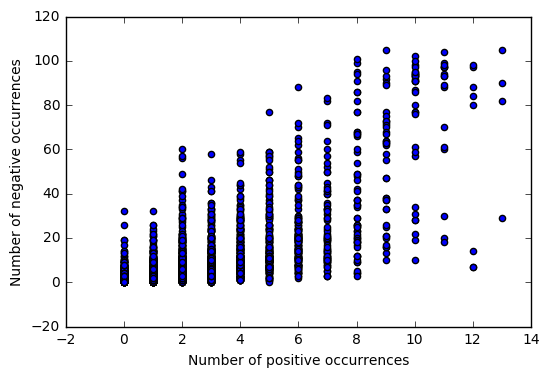

In [49]:
import matplotlib.pyplot as plt
plt.scatter(posCounts[1:-1], negCounts[1:-1])
plt.xlabel("Number of positive occurrences")
plt.ylabel("Number of negative occurrences")
plt.show()


In [61]:
numNoPositive = 0
numNoNegative = 0
numNever = 0 
numMixed = 0
for row in range(len(posCounts)):
    if negCounts[row] == 0 and posCounts[row] > 0:
        numNoNegative += 1
    elif negCounts[row] > 0 and posCounts[row] == 0:
        numNoPositive += 1
    elif negCounts[row] == 0 and posCounts[row] == 0:
        numNever += 1
    else:
        numMixed += 1
        
        
print("total number of motifs:", len(posCounts))
print("total classified motifs:",(numNoPositive + numNoNegative + numNever + numMixed))      
print("number of negative only motifs:", numNoPositive)
print("number of positive only motifs:", numNoNegative)
print("number of never motifs:", numNever)
print("number of mixed motifs:", numMixed)

total number of motifs: 3521
total classified motifs: 3521
number of negative only motifs: 326
number of positive only motifs: 70
number of never motifs: 410
number of mixed motifs: 2715
